# Pandas and data wrangling

Pandas is a tool for accessing columnar data, like that in SQL tables or CSV files.

In [1]:
# convention recommended in documentation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#enable inline plotting in notebook

%matplotlib inline


Let's start by reading in a dataset. This dataset is about different subclasses of the iris flower.

We'll use it for another exercise later on.

In [2]:
df = pd.read_csv("../data/iris.data")
df = df.sample(frac=0.2) # only use 20% of the data so the results aren't so long
type(df)

pandas.core.frame.DataFrame

DataFrame is the basic building block of Pandas. It represents two-dimensional data with labeled rows and columns. 



In [42]:
# Columns can have different types.
# you can check the data types of the values
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
class            object
dtype: object

In [43]:
# you can access the dataframe with a single column name
df["petal.width"]
# this leaves the original unmodified

129    1.6
3      0.2
57     1.0
121    2.0
125    1.8
106    1.7
69     1.1
118    2.3
47     0.2
32     0.1
64     1.3
141    2.3
52     1.5
93     1.0
17     0.3
134    1.4
56     1.6
103    1.8
117    2.2
36     0.2
91     1.4
110    2.0
132    2.2
71     1.3
148    2.3
67     1.0
61     1.5
99     1.3
111    1.9
15     0.4
Name: petal.width, dtype: float64

In [44]:
# then the returned type is a Series, the second major concept in Pandas
type(df["petal.width"])

pandas.core.series.Series

In [ ]:
# 

In [48]:
# alternately you can index a dataframe with a list of column names
df[["sepal.length", "petal.width", "class"]]

,sepal.length,petal.width,class
129,7.2,1.6,Iris-virginica
3,4.6,0.2,Iris-setosa
57,4.9,1.0,Iris-versicolor
121,5.6,2.0,Iris-virginica
125,7.2,1.8,Iris-virginica
106,4.9,1.7,Iris-virginica
69,5.6,1.1,Iris-versicolor
118,7.7,2.3,Iris-virginica
47,4.6,0.2,Iris-setosa
32,5.2,0.1,Iris-setosa


In [49]:
# the comparison operator returns a list of boolean 
matching = df["sepal.width"] > df["petal.length"]
matching


129    False
3       True
57     False
121    False
125    False
106    False
69     False
118    False
47      True
32      True
64     False
141    False
52     False
93     False
17      True
134    False
56     False
103    False
117    False
36      True
91     False
110    False
132    False
71     False
148    False
67     False
61     False
99     False
111    False
15      True
dtype: bool

In [50]:
# which can also be used to query the dataframe
df[list_]

# or more idiomatically

df[df["sepal.width"] > df["petal.length"]]

/Users/suvileht/.envs/python-kurssi/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,sepal.length,sepal.width,petal.length,petal.width,class
3,4.6,3.1,1.5,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


In [62]:
# one can get aggregates of single dimensions

df["sepal.width"].var() # try min, max, mean, median, sum, var

0.23075862068965522

In [65]:
# or of the whole thing

df.sum() # same operations as above

sepal.length                                                179.7
sepal.width                                                  91.2
petal.length                                                125.8
petal.width                                                  40.9
class           Iris-virginicaIris-setosaIris-versicolorIris-v...
dtype: object

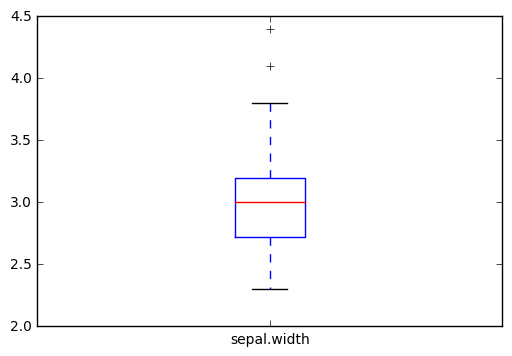

In [51]:
# it's also possible to plot simple graphs using a simpleish syntax

df["sepal.width"].plot.box()

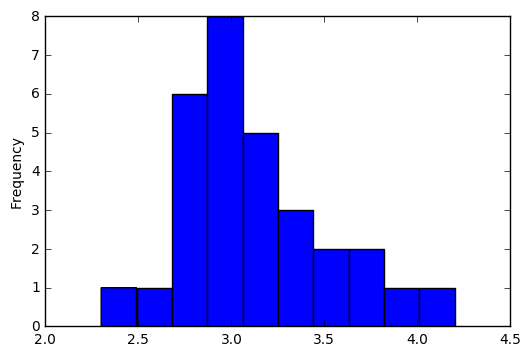

In [108]:
df["sepal.width"].plot.hist()

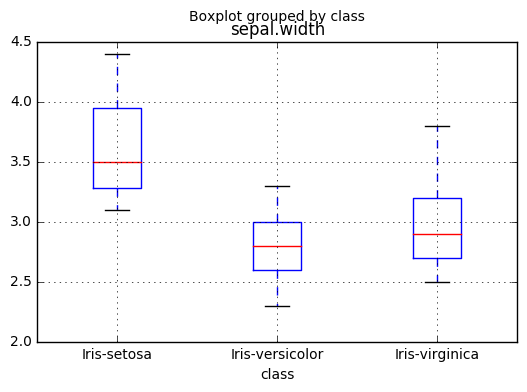

In [52]:
df.boxplot(column="sepal.width", by="class")

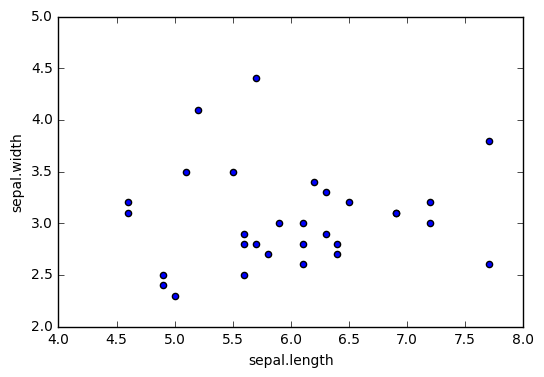

In [85]:
df.plot.scatter(x="sepal.length", y="sepal.width")

In [87]:
df.groupby("class").mean()

,sepal.length,sepal.width,petal.length,petal.width
class,,,,
Iris-setosa,5.116667,3.633333,1.433333,0.233333
Iris-versicolor,5.809091,2.800000,4.063636,1.272727
Iris-virginica,6.546154,2.969231,5.576923,1.961538


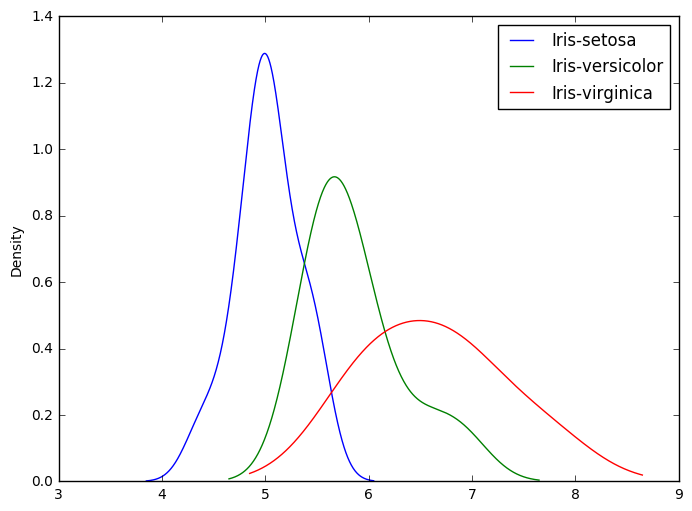

In [107]:
# creating a grouped by plot requires a loop
fig, ax = plt.subplots(figsize=(8,6))
for label, df_ in df.groupby('class'):
    df_["sepal.length"].plot(kind="kde", ax=ax, label=label)
plt.legend()

## Exercises: Davis data set

Read in the Davis data set of self reported heights and weights from "../data/davis.data".

Plot box plots of the data. Is there a value that is off? 

How do you remove it?